# Wilson Analytics

All bank branches across India provide MUDRA loans. Such loans have created the low-cost credit concept for micro and small businesses. One of the leading financial institutions in India wants to leverage Machine Learning techniques to determine the client’s loan repayment abilities and take proactive steps to reduce the magnitude of exposure to default. 

Goal: The goal of the problem is to predict whether a client will default on the loan payment or not, given the recent data of all the loan transactions. This can help the institution to distinguish future applicants who might default. For each ID in the Test Dataset, you must predict the “Default” level.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)

# Code to ignore warnings from function usage
import warnings;
#import numpy as np
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('training_data.csv')
dft = df.copy()
dft.head().T

,0,1,2,3,4
ID,0,1,2,3,4
Date_Of_Disbursement,31-Jul-91,30-Apr-06,30-Jun-04,31-Jan-06,31-Dec-04
Business,Existing,New,Existing,New,Existing
Jobs_Reatained,0,0,4,9,4
Jobs_Created,0,6,0,1,0
Year_Of_Commitment,1991,2006,2004,2006,2005
Guaranteed_Approved _Loan,Rs.33121600.0,Rs.32735520.0,Rs.1422400.0,Rs.2032000.0,Rs.22981920.0
Borrower_Name,STANDARD PARTS CORPORATION,FRANK & KERI AMESTOY,TELECOMMQC L L C,"K & A AUTOMOTIVE, INC. DBA MUF",SUNBEAM DELI
Low_Documentation_Loan,No,No,No,No,No
Demography,Undefined,Urban,Urban,Urban,Urban


In [141]:
dft.tail().T

,104995,104996,104997,104998,104999
ID,104995,104996,104997,104998,104999
Date_Of_Disbursement,31-Dec-98,30-Nov-03,31-Mar-06,16-May-07,31-Dec-01
Business,New,New,New,Existing,New
Jobs_Reatained,0,0,6,0,0
Jobs_Created,0,0,0,3,0
Year_Of_Commitment,1999,2004,2006,2007,2001
Guaranteed_Approved _Loan,Rs.5136896.0,Rs.6908800.0,Rs.812800.0,Rs.10810240.0,Rs.10363200.0
Borrower_Name,PURPOSE PUBLISHING,NANA BEAR'S QUILTS,Pho 777,FLEX TEMP CORPORATION dba LABO,"SOUTH MOUNTAIN FITNESS, A PART"
Low_Documentation_Loan,Yes,Yes,No,No,Yes
Demography,Undefined,Rural,Urban,Urban,Urban


In [142]:
dft.shape

(105000, 26)

In [143]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [144]:
dft.isna().sum()

ID                             0
Date_Of_Disbursement         235
Business                      15
Jobs_Reatained                 0
Jobs_Created                   0
Year_Of_Commitment             0
Guaranteed_Approved _Loan      0
Borrower_Name                  3
Low_Documentation_Loan       367
Demography                     0
State_Of_Bank                  0
ChargedOff_Amount              0
Borrower_City                  0
Borrower_State                 0
Gross_Amount_Balance           0
Count_Employees                0
Classification_Code            0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Commitment_Date                0
Primary_Loan_Digit             0
Code_Franchise                 0
Name_Of_Bank                   0
Revolving_Credit_Line        491
Default                        0
dtype: int64

In [145]:
dft.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,105000.0,5.249950e+04,3.031103e+04,0.000000e+00,2.624975e+04,5.249950e+04,7.874925e+04,1.049990e+05
Jobs_Reatained,105000.0,1.268865e+01,2.705442e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,8.800000e+03
Jobs_Created,105000.0,1.037925e+01,2.703408e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03
Count_Employees,105000.0,9.904248e+00,5.815706e+01,0.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00,7.200000e+03
Classification_Code,105000.0,4.059183e+05,2.603360e+05,0.000000e+00,2.361150e+05,4.471100e+05,5.617400e+05,9.281200e+05
Loan_Term,105000.0,1.564384e+02,1.164127e+02,0.000000e+00,9.000000e+01,1.260000e+02,1.800000e+02,6.920000e+02
Primary_Loan_Digit,105000.0,4.661622e+09,2.546599e+09,1.000034e+09,2.478163e+09,4.119824e+09,6.760484e+09,9.996003e+09
Code_Franchise,105000.0,2.707202e+03,1.266061e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.200600e+04
Default,105000.0,2.771810e-01,4.476087e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


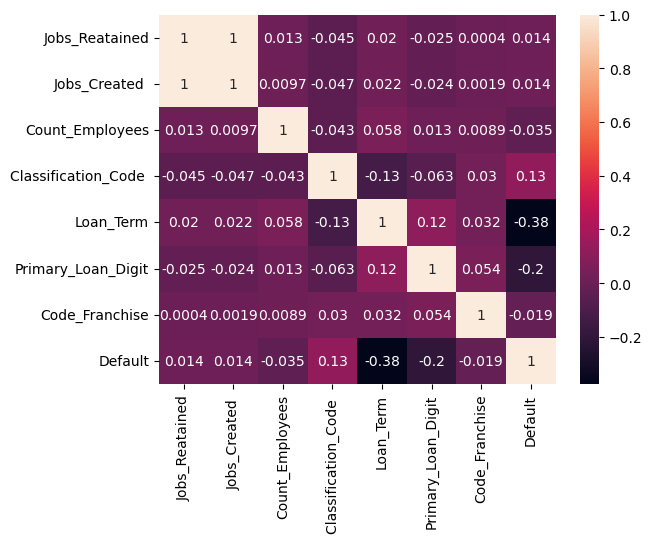

In [146]:
corr_matrix = dft.iloc[:,1:].corr() 
#plt.figure(figsize=(8,8)) 
sns.heatmap(corr_matrix, annot = True)                                     
plt.show()

There is a moderate negative correlation between loan_term and default. Longer terms loans tend not to default.

In [147]:
# Printing number of count of each unique value in each column
for column in dft.columns:
    print(dft[column].value_counts())
    print('-'*50)

0         1
69995     1
70005     1
70004     1
70003     1
         ..
34998     1
34997     1
34996     1
34995     1
104999    1
Name: ID, Length: 105000, dtype: int64
--------------------------------------------------
31-Jul-95    1111
30-Apr-95    1077
31-Jan-95    1064
31-Oct-94     946
31-Mar-06     922
             ... 
13-Dec-94       1
11-Feb-80       1
23-May-12       1
14-Jan-81       1
2-May-80        1
Name: Date_Of_Disbursement, Length: 3505, dtype: int64
--------------------------------------------------
Existing    75091
New         29789
0             105
Name: Business, dtype: int64
--------------------------------------------------
0      48776
1      11242
2       9526
3       6452
4       4864
       ...  
199        1
104        1
177        1
220        1
400        1
Name: Jobs_Reatained, Length: 191, dtype: int64
--------------------------------------------------
0       72288
1        8063
2        7256
3        3472
4        2485
        ...  
1016        1


In [148]:
# Some column names have a different format. Rename to make them all the same
dft = dft.rename(columns={'Borrower_Name ': 'Borrower_Name', 'Year_Of_Commitment ':'Year_Of_Commitment', \
                          'Gross_Amount_Disbursed  ':'Gross_Amount_Disbursed', \
                 'Classification_Code ': 'Classification_Code', 'ChargedOff_Amount ':'ChargedOff_Amount', \
                 'Guaranteed_Approved _Loan':'Guaranteed_Approved_Loan', 'Jobs_Created ':'Jobs_Created'}
                )
dft[dft.Borrower_Name.isna()]

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
7882,7882,31-May-99,Existing,0,0,1999,Rs.4064000.0,NaN,No,Undefined,...,541512,Rs.8128000.0,Rs.8128000.0,90,23-Feb-99,1003575009,1,Dhanlaxmi Bank Ltd.,Yes,0
54833,54833,30-Apr-99,New,0,0,1998,Rs.4064000.0,NaN,No,Undefined,...,0,Rs.8128000.0,Rs.8128000.0,90,11-Sep-98,1003125003,1,Dhanlaxmi Bank Ltd.,Yes,0
91071,91071,17-Oct-11,New,1,1,2012,Rs.1828800.0,NaN,No,Urban,...,484220,Rs.3657600.0,Rs.3657600.0,58,17-Oct-11,4915765003,0,Tamilnad Mercantile Bank Ltd.,No,0


In [149]:
# Not sure why there is missing data here so drop the 3 columns
dft.drop([7882,54833, 91071], axis=0, inplace=True)

In [150]:
# Format for the state names is not all the same. Strip off white space.
dft['Borrower_State'] = dft['Borrower_State'].str.strip(' ')
dft['Borrower_State'].unique()

array(['Maharashtra', 'Delhi', 'Karnataka', 'Gujarat', 'Telangana',
       'Tamil Nadu', 'West Bengal', 'Rajasthan', 'Uttar Pradesh', 'Bihar',
       'Madhya Pradesh', 'Andhra Pradesh', 'Punjab', 'Haryana',
       'Jammu and Kashmir', 'Jharkhand', 'Chhattisgarh', 'Assam',
       'Chandigarh', 'Odisha', 'Kerala', 'Uttarakhand', 'Puducherry',
       'Tripura', 'Karnatka', 'Mizoram', 'Meghalaya', 'Manipur',
       'Himachal Pradesh', 'Nagaland', 'Goa',
       'Andaman and Nicobar Islands', 'Hardoi', 'Arunachal Pradesh',
       'Bulandshahr', 'Rampur', 'Ajmer', 'Agra', 'Farrukhabad', 'India',
       'Dadra and Nagar Haveli'], dtype=object)

In [151]:
# Drop ID and Primary loan digit as they're all unique
dft.drop(columns=["ID", 'Primary_Loan_Digit', 'Date_Of_Disbursement'], inplace=True)

In [152]:
dft[dft.duplicated()]

,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default


In [153]:
# Many missing dates. Not sure why
# dft[dft.Date_Of_Disbursement.isna()]

In [154]:
# There are more excisting businesses than new ones so change missing values to existing
dft['Business'] = dft['Business'].fillna('Existing')
dft.isnull().sum()

Business                      0
Jobs_Reatained                0
Jobs_Created                  0
Year_Of_Commitment            0
Guaranteed_Approved_Loan      0
Borrower_Name                 0
Low_Documentation_Loan      367
Demography                    0
State_Of_Bank                 0
ChargedOff_Amount             0
Borrower_City                 0
Borrower_State                0
Gross_Amount_Balance          0
Count_Employees               0
Classification_Code           0
Loan_Approved_Gross           0
Gross_Amount_Disbursed        0
Loan_Term                     0
Commitment_Date               0
Code_Franchise                0
Name_Of_Bank                  0
Revolving_Credit_Line       491
Default                       0
dtype: int64

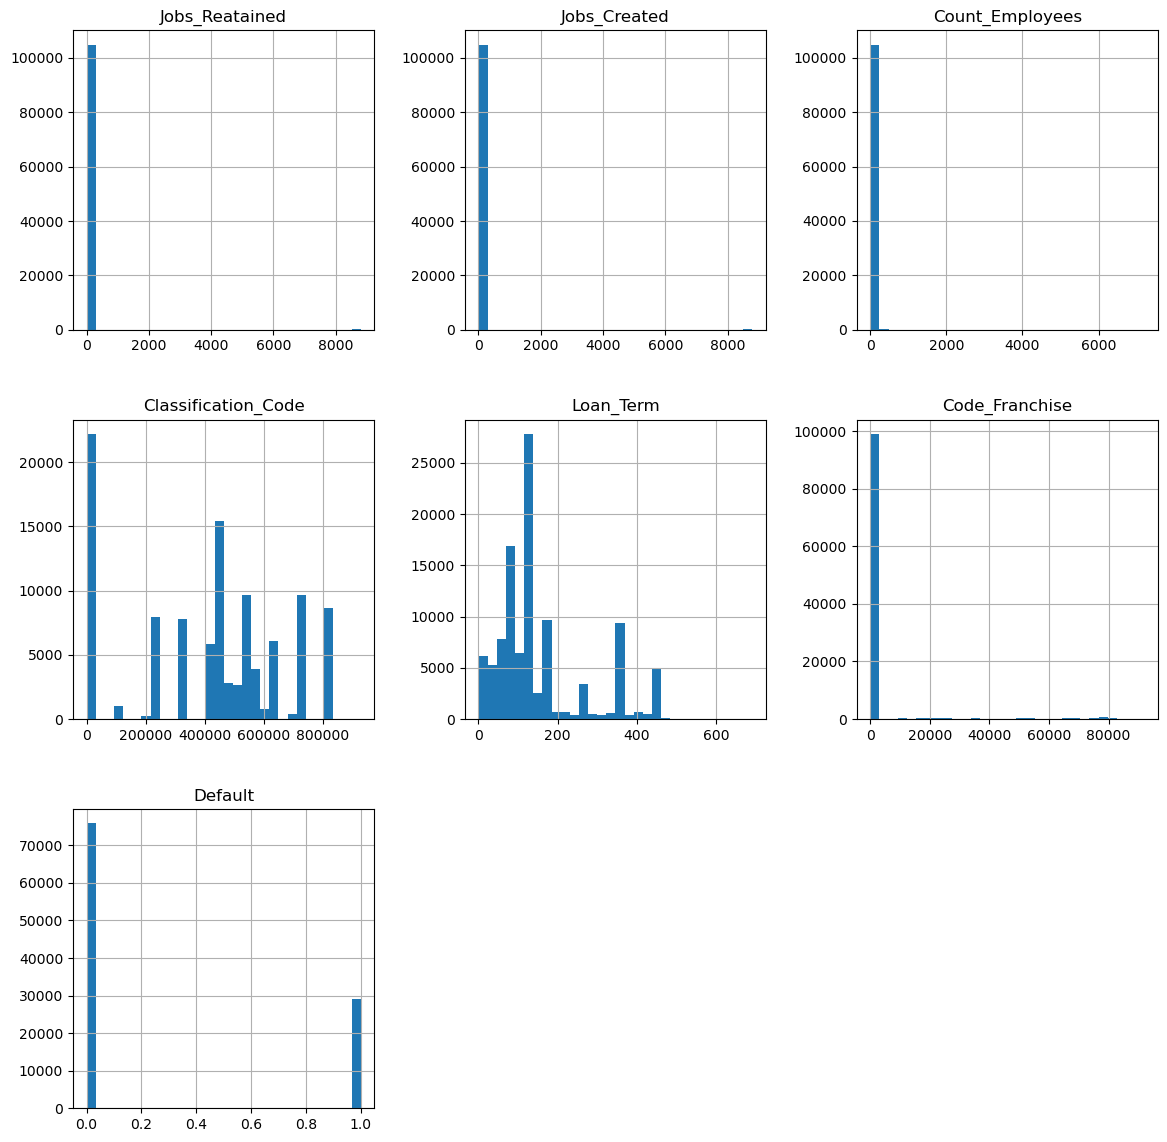

In [155]:
col_list = dft.columns.tolist()
# num_cols = ['ID', 'Jobs_Reatained', 'Count_Employees', 'Loan_Term', \
#             'Primary_Loan_Digit', 'Code_Franchise', 'Default']

# cat_cols = ['Business', 'Low_Documentation_Loan', 'Demography', 'State_Of_Bank', \
#             'Borrower_City', 'Borrower_State', 'Loan_Term', 'Revolving_Credit_Line', 'Default']
dft[col_list].hist(figsize=(14,14), bins=30)
plt.show()

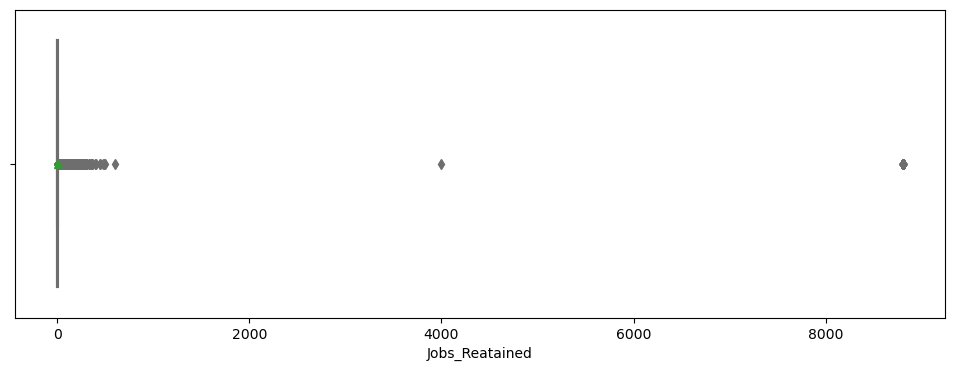

In [156]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=dft, x="Jobs_Reatained", showmeans=True, color="violet")
plt.show()

In [157]:
dft.loc[(dft["Jobs_Reatained"] >= 3500)] # quite a few...maybe shouldn't be dropped

,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved_Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
652,New,8800,8800,1986,Rs.4675632.0,"STAR TROPICS, INC.",No,Undefined,AS,Rs.5099100.8,...,9,0,Rs.5283200.0,Rs.5283200.0,126,2-Jul-86,0,Deutsche Bank,No,1
1230,Existing,8800,8800,1986,Rs.16418560.0,"APPLIED CHEMICAL TECHNOLOGY, I",No,Undefined,GA,Rs.0.0,...,12,0,Rs.16418560.0,Rs.16418560.0,360,5-Aug-86,0,Jharkhand Rajya Gramin Bank,No,0
2301,Existing,8800,8800,1986,Rs.5388864.0,NATIONAL VIDEO,No,Undefined,RJ,Rs.1911217.92,...,5,0,Rs.6339840.0,Rs.6339840.0,42,11-Aug-86,58517,Baroda UP Bank,No,1
2850,New,8800,8800,1986,Rs.3495040.0,MACFARLANE BUILDING SVC INC,No,Undefined,MH,Rs.3341014.4,...,3,0,Rs.4064000.0,Rs.4064000.0,9,5-Aug-86,0,Sarva Haryana Gramin Bank,No,1
3507,Existing,8800,8800,1986,Rs.3657600.0,WORLDWIDE ELECTRONICS,No,Undefined,AS,Rs.2698496.0,...,3,0,Rs.4064000.0,Rs.4064000.0,38,10-Sep-86,0,State Bank of India,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97969,New,8800,8800,1986,Rs.5266944.0,"ORIGINAL FOODS, INC.",No,Undefined,DL,Rs.629351.04,...,7,0,Rs.5852160.0,Rs.5852160.0,146,9-Jul-86,0,Standard Chartered Bank,No,1
98700,Existing,8800,8800,1986,Rs.4535424.0,GRANNYS PEPPERMINT PALACE,No,Undefined,MH,Rs.2973953.92,...,3,0,Rs.5039360.0,Rs.5039360.0,58,17-Sep-86,0,Punjab & Sind Bank,No,1
100915,Existing,8800,8800,1986,Rs.40640000.0,"JACK JONES TRUCKING, INC.",No,Undefined,TR,Rs.0.0,...,69,0,Rs.40640000.0,Rs.40640000.0,360,1-Aug-86,0,BNP Paribas,No,0
102825,Existing,8800,8800,1986,Rs.8046720.0,"DOC HONEST, INC.",No,Undefined,CG,Rs.0.0,...,6,0,Rs.8046720.0,Rs.7884160.0,360,10-Jul-86,0,South Indian Bank Ltd.,No,0


<AxesSubplot:xlabel='Count_Employees'>

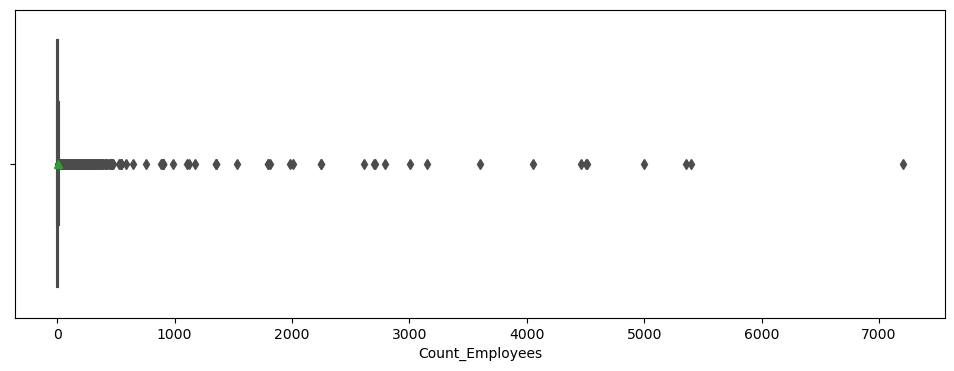

In [158]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=dft, x="Count_Employees", showmeans=True, color="blue")

<AxesSubplot:xlabel='Code_Franchise'>

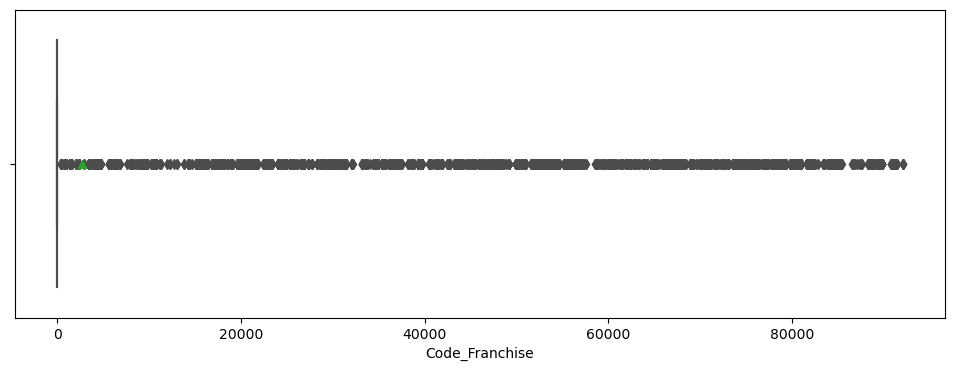

In [159]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=dft, x="Code_Franchise", showmeans=True, color="blue")

In [160]:
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Default %')

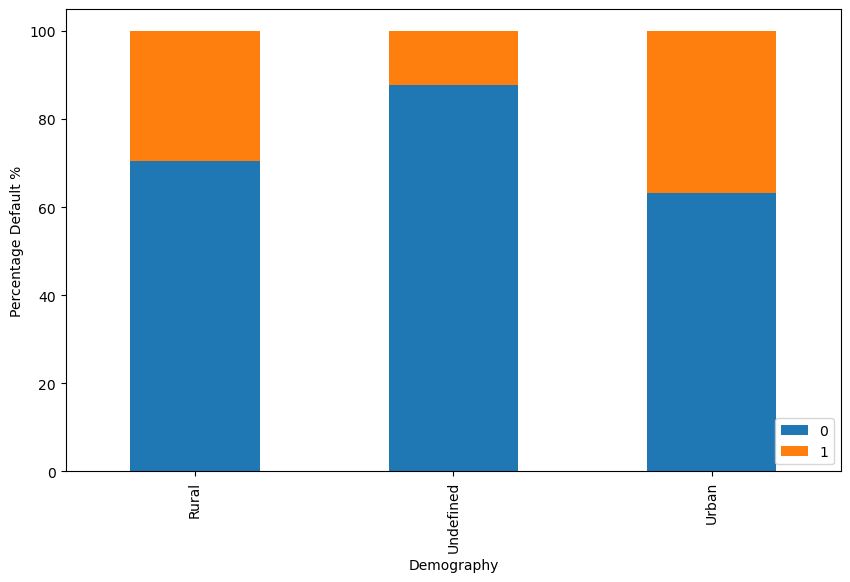

In [161]:
stacked_barplot(dft, 'Demography', 'Default') 
# large number of loans are from an undefined demographic so keep them as they are. but this may not give us much info

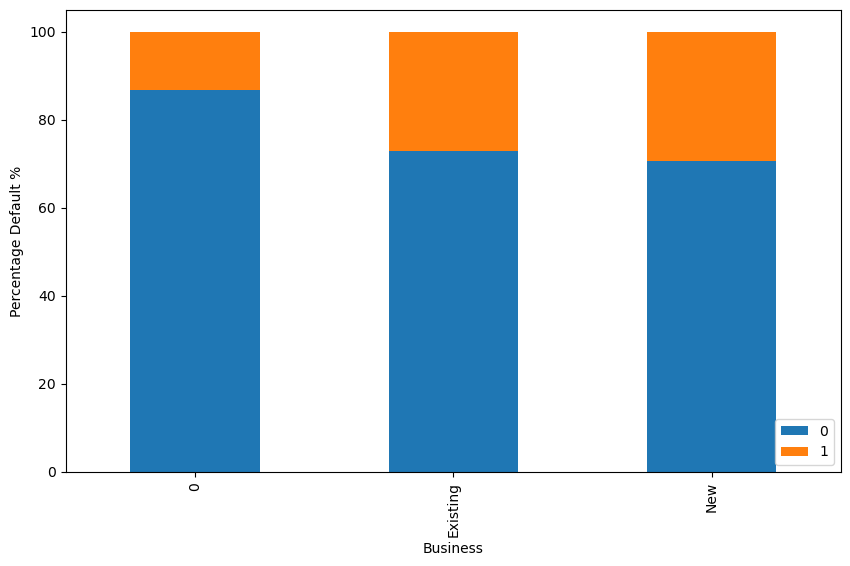

In [162]:
stacked_barplot(dft, 'Business', 'Default')

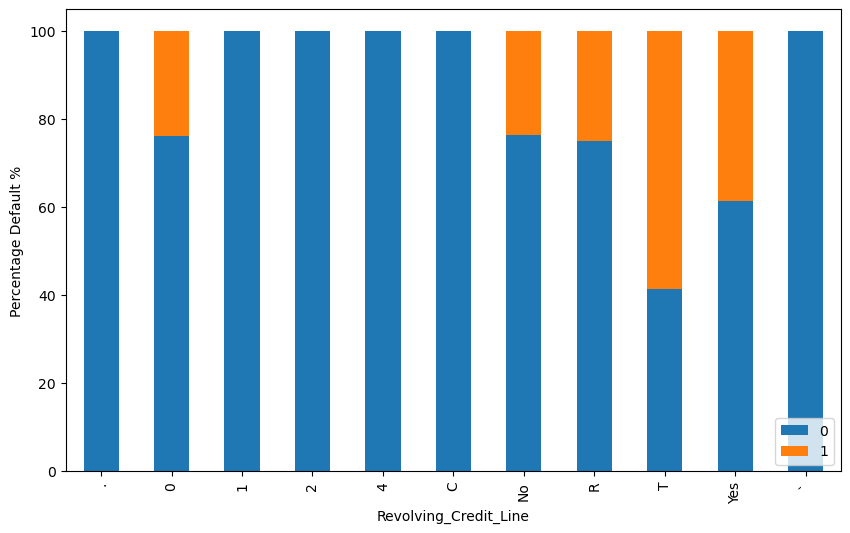

In [163]:
stacked_barplot(dft, 'Revolving_Credit_Line', 'Default')

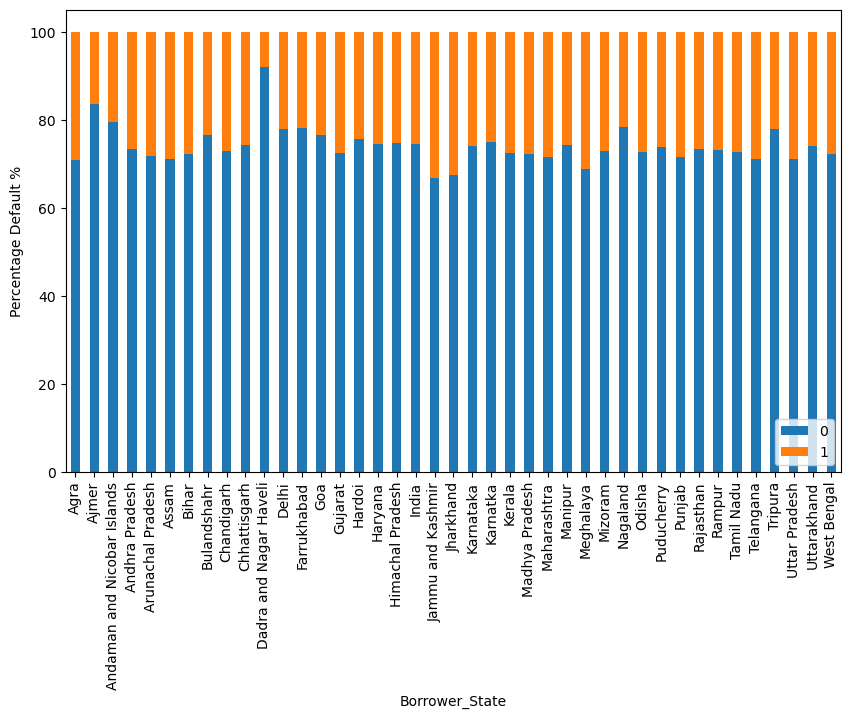

In [164]:
stacked_barplot(dft, 'Borrower_State', 'Default')

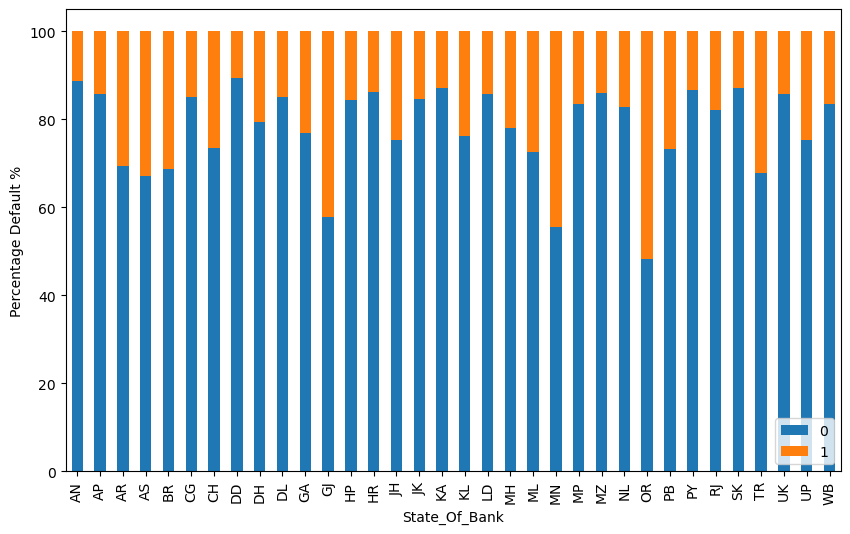

In [165]:
stacked_barplot(dft, 'State_Of_Bank', 'Default')

No notable trend but GJ, MN and OR have noticeably higher default percentage compared to others 

In [166]:
business_categories = pd.DataFrame(
      {'Business': ['Existing' ,'New']})
unique_business_types = set(dft['Business'].unique())
inconsistent_cats = unique_business_types.difference(business_categories['Business'])
print(inconsistent_cats)
inconsistent = dft['Business'].isin(inconsistent_cats)
inconsistent_rows = dft[inconsistent]
dft = dft.drop(inconsistent_rows.index)

# Using negative conditioning
dft = dft[~inconsistent]

# Check the results
assert set(dft['Business'].unique()) == set(business_categories['Business'])
# Set blood_type as a categorical variable
dft['Business'] = dft['Business'].astype('category')

# # Check that the results are in effect
# assert dft['Business'].dtype == 'category'

{'0'}


In [167]:
credit_cats = pd.DataFrame(
      {'Revolving_Credit_Line': ['Yes' ,'No', '0', 'T']})
unique_line_types = set(dft['Revolving_Credit_Line'].unique())
inconsistent_cats = unique_line_types.difference(credit_cats['Revolving_Credit_Line'])
print(inconsistent_cats)
inconsistent = dft['Revolving_Credit_Line'].isin(inconsistent_cats)
inconsistent_rows = dft[inconsistent]
dft = dft.drop(inconsistent_rows.index)

# Using negative conditioning
dft = dft[~inconsistent]

# Check the results
assert set(dft['Revolving_Credit_Line'].unique()) == set(credit_cats['Revolving_Credit_Line'])
# Set blood_type as a categorical variable
dft['Revolving_Credit_Line'] = dft['Revolving_Credit_Line'].astype('category')

# # Check that the results are in effect
# assert dft['Revolving_Credit_Line'].dtype == 'category'

{nan, 'R', '`', '1', '2', 'C', '4', '.'}


In [242]:
low_doc_cats = pd.DataFrame(
      {'Low_Documentation_Loan': ['Yes', 'No']})
unique_low_types = set(dft['Low_Documentation_Loan'].unique())
inconsistent_cats = unique_low_types.difference(low_doc_cats['Low_Documentation_Loan'])
print(inconsistent_cats)
inconsistent = dft['Low_Documentation_Loan'].isin(inconsistent_cats)
inconsistent_rows = dft[inconsistent]
dft = dft.drop(inconsistent_rows.index)

# Using negative conditioning
dft = dft[~inconsistent]

# Check the results
assert set(dft['Low_Documentation_Loan'].unique()) == set(low_doc_cats['Low_Documentation_Loan'])
# Set blood_type as a categorical variable
dft['Low_Documentation_Loan'] = dft['Low_Documentation_Loan'].astype('category')

# Check that the results are in effect
assert dft['Low_Documentation_Loan'].dtype == 'category'

set()


In [169]:
dft.nunique()

Business                        2
Jobs_Reatained                190
Jobs_Created                  128
Year_Of_Commitment             91
Guaranteed_Approved_Loan    10022
Borrower_Name               99772
Low_Documentation_Loan          2
Demography                      3
State_Of_Bank                  34
ChargedOff_Amount           22826
Borrower_City                1193
Borrower_State                 41
Gross_Amount_Balance            3
Count_Employees               277
Classification_Code          1199
Loan_Approved_Gross          6165
Gross_Amount_Disbursed      23351
Loan_Term                     344
Commitment_Date              7678
Code_Franchise               1199
Name_Of_Bank                  143
Revolving_Credit_Line           4
Default                         2
dtype: int64

In [170]:
dft.isna().sum()

Business                    0
Jobs_Reatained              0
Jobs_Created                0
Year_Of_Commitment          0
Guaranteed_Approved_Loan    0
Borrower_Name               0
Low_Documentation_Loan      0
Demography                  0
State_Of_Bank               0
ChargedOff_Amount           0
Borrower_City               0
Borrower_State              0
Gross_Amount_Balance        0
Count_Employees             0
Classification_Code         0
Loan_Approved_Gross         0
Gross_Amount_Disbursed      0
Loan_Term                   0
Commitment_Date             0
Code_Franchise              0
Name_Of_Bank                0
Revolving_Credit_Line       0
Default                     0
dtype: int64

In [171]:
dft[['Demography','State_Of_Bank', 'Borrower_City', 'Borrower_State', 'Name_Of_Bank']] = dft[['Demography','State_Of_Bank', \
                                                                                              'Borrower_City', 'Borrower_State', 'Name_Of_Bank']].astype('category')


In [172]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103627 entries, 0 to 104999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Business                  103627 non-null  category
 1   Jobs_Reatained            103627 non-null  int64   
 2   Jobs_Created              103627 non-null  int64   
 3   Year_Of_Commitment        103627 non-null  object  
 4   Guaranteed_Approved_Loan  103627 non-null  object  
 5   Borrower_Name             103627 non-null  object  
 6   Low_Documentation_Loan    103627 non-null  category
 7   Demography                103627 non-null  category
 8   State_Of_Bank             103627 non-null  category
 9   ChargedOff_Amount         103627 non-null  object  
 10  Borrower_City             103627 non-null  category
 11  Borrower_State            103627 non-null  category
 12  Gross_Amount_Balance      103627 non-null  object  
 13  Count_Employees           103

In [267]:
dft['Jobs_Reatained'] = dft['Jobs_Reatained'].astype('float32')
dft['Jobs_Created'] = dft['Jobs_Created'].astype('float32')
dft['Count_Employees'] = dft['Count_Employees'].astype('float32')
dft['Classification_Code'] = dft['Classification_Code'].astype('float32')
dft['Code_Franchise'] = dft['Code_Franchise'].astype('float32')
dft['Default'] = dft['Default'].astype('float32')

ValueError: assignment destination is read-only

In [244]:
dft.shape

(103627, 23)

Building models

In [273]:
## Separating Independent and Dependent Columns
X = dft.drop(['Default'],axis=1)
Y = dft[['Default']]
X.columns.to_list()
Y.columns.to_list()

['Default']

In [274]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103627 entries, 0 to 104999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Business                  103627 non-null  category
 1   Jobs_Reatained            103627 non-null  int64   
 2   Jobs_Created              103627 non-null  int64   
 3   Year_Of_Commitment        103627 non-null  object  
 4   Guaranteed_Approved_Loan  103627 non-null  object  
 5   Borrower_Name             103627 non-null  object  
 6   Low_Documentation_Loan    103627 non-null  category
 7   Demography                103627 non-null  category
 8   State_Of_Bank             103627 non-null  category
 9   ChargedOff_Amount         103627 non-null  object  
 10  Borrower_City             103627 non-null  category
 11  Borrower_State            103627 non-null  category
 12  Gross_Amount_Balance      103627 non-null  object  
 13  Count_Employees           103

In [275]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [276]:
labelencoder_B = LabelEncoder()
X_train['Business']= labelencoder_B.fit_transform(X_train['Business'])
X_test['Business']= labelencoder_B.transform(X_test['Business'])

labelencoder_LDL = LabelEncoder()
X_train['Low_Documentation_Loan']= labelencoder_LDL.fit_transform(X_train['Low_Documentation_Loan'])
X_test['Low_Documentation_Loan']= labelencoder_LDL.transform(X_test['Low_Documentation_Loan'])

labelencoder_D = LabelEncoder()
X_train['Demography']= labelencoder_D.fit_transform(X_train['Demography'])
X_test['Demography']= labelencoder_D.transform(X_test['Demography'])

labelencoder_SOB = LabelEncoder()
X_train['State_Of_Bank']= labelencoder_SOB.fit_transform(X_train['State_Of_Bank'])
X_test['State_Of_Bank']= labelencoder_SOB.transform(X_test['State_Of_Bank'])

labelencoder_BC = LabelEncoder()
X_train['Borrower_City']= labelencoder_BC.fit_transform(X_train['Borrower_City'])
X_test['Borrower_City']= labelencoder_BC.transform(X_test['Borrower_City'])

labelencoder_BS = LabelEncoder()
X_train['Borrower_State']= labelencoder_BS.fit_transform(X_train['Borrower_State'])
X_test['Borrower_State']= labelencoder_BS.transform(X_test['Borrower_State'])

labelencoder_NOB = LabelEncoder()
X_train['Name_Of_Bank']= labelencoder_NOB.fit_transform(X_train['Name_Of_Bank'])
X_test['Name_Of_Bank']= labelencoder_NOB.transform(X_test['Name_Of_Bank'])

labelencoder_RCL = LabelEncoder()
X_train['Revolving_Credit_Line']= labelencoder_RCL.fit_transform(X_train['Revolving_Credit_Line'])
X_test['Revolving_Credit_Line']= labelencoder_RCL.transform(X_test['Revolving_Credit_Line'])

In [277]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(82901, 22)
(20726, 22)
(82901, 1)
(20726, 1)


Model 1

In [278]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [279]:
# We will be adding the layers sequentially
model1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model1.add(Dense(64, activation='relu', input_shape=(22,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model1.add(Dense(32, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of a Customer is satisfied with the Experience  
model1.add(Dense(1, activation='sigmoid'))

In [280]:
# Create optimizer with default learning rate
# Compile the model
model1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [281]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1472      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [283]:
history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=25, verbose=2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103627 entries, 0 to 104999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Business                  103627 non-null  category
 1   Jobs_Reatained            103627 non-null  float32 
 2   Jobs_Created              103627 non-null  float32 
 3   Year_Of_Commitment        103627 non-null  object  
 4   Guaranteed_Approved_Loan  103627 non-null  object  
 5   Borrower_Name             103627 non-null  object  
 6   Low_Documentation_Loan    103627 non-null  category
 7   Demography                103627 non-null  category
 8   State_Of_Bank             103627 non-null  category
 9   ChargedOff_Amount         103627 non-null  object  
 10  Borrower_City             103627 non-null  category
 11  Borrower_State            103627 non-null  category
 12  Gross_Amount_Balance      103627 non-null  object  
 13  Count_Employees           103